In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import process_games

In [7]:
games = pd.read_csv(os.path.join(basepath,'data/games.csv'))

In [8]:
players = pd.read_csv(os.path.join(basepath,'data/players.csv')).set_index('nflId')

In [9]:
plays = pd.read_csv(os.path.join(basepath,'data/plays.csv'))

In [10]:
weeks = {}
for i in range(3):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join(basepath,'data',name+'-processed.csv'))

In [11]:
teams = process_games(games,plays)

In [12]:
team = teams['IND']

In [13]:
team.games

{'week1': <src.game.Game at 0x1a263d3be0>,
 'week2': <src.game.Game at 0x1a2a925828>,
 'week3': <src.game.Game at 0x1a2a945588>,
 'week4': <src.game.Game at 0x1a1b660390>,
 'week5': <src.game.Game at 0x1a1b6792e8>,
 'week6': <src.game.Game at 0x1a1b6a20f0>,
 'week7': <src.game.Game at 0x1a1b6ad8d0>,
 'week8': <src.game.Game at 0x1a1b6d00f0>,
 'week10': <src.game.Game at 0x1a1b6ece10>,
 'week11': <src.game.Game at 0x1a1b707390>,
 'week12': <src.game.Game at 0x1a1b7198d0>,
 'week13': <src.game.Game at 0x1a1b736ac8>,
 'week14': <src.game.Game at 0x1a1b746d68>,
 'week15': <src.game.Game at 0x1a1b761b70>,
 'week16': <src.game.Game at 0x1a1b769fd0>,
 'week17': <src.game.Game at 0x1a1b7970f0>}

In [14]:
team.process_weeks(weeks)

/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/

In [15]:
game = team.games['week1']
game.list_plays()

Play 1: (14:11) (Shotgun) A.Dalton pass short left intended for J.Mixon INTERCEPTED by K.Moore II at CIN 39. K.Moore II to CIN 7 for 32 yards (A.Dalton).
Play 2: (12:32) A.Dalton pass short right to T.Eifert pushed ob at CIN 40 for 29 yards (M.Hooker).
Play 3: (11:17) (Shotgun) A.Dalton pass short left to J.Mixon to IND 32 for 21 yards (C.Geathers).
Play 4: (9:58) A.Dalton pass short right to A.Green to IND 22 for 5 yards (N.Hairston).
Play 5: (8:35) (Shotgun) A.Dalton pass incomplete deep right to J.Ross.
Play 6: (8:30) (Shotgun) A.Dalton pass incomplete short middle to T.Boyd (J.Sheard).
Play 7: (1:23) A.Dalton pass short right to J.Mixon to CIN 33 for 8 yards (N.Hairston).
Play 8: (:58) (No Huddle, Shotgun) A.Dalton pass short right to T.Kroft to CIN 42 for 9 yards (A.Walker, D.Leonard).
Play 9: (:11) (Shotgun) A.Dalton pass short left to A.Green to IND 45 for 13 yards (M.Farley). FUMBLES (M.Farley), touched at IND 45, RECOVERED by IND-D.Leonard at IND 42. D.Leonard to IND 42 for no

In [16]:
for play in game.plays:
    play.process_players(players)
    if play.hasForwardPass:
        play.find_dropback_events()
    play.process_coverage()

In [17]:
play_number = 7

In [19]:
play = game.plays[play_number - 1]

In [20]:
play.play_data

gameId                                                           2018090902
playId                                                                  797
playDescription           (1:23) A.Dalton pass short right to J.Mixon to...
quarter                                                                   1
down                                                                      1
yardsToGo                                                                10
possessionTeam                                                          CIN
playType                                                     play_type_pass
yardlineSide                                                            CIN
yardlineNumber                                                           25
offenseFormation                                                     I_FORM
personnelO                                                 1 RB, 2 TE, 2 WR
defendersInTheBox                                                         7
numberOfPass

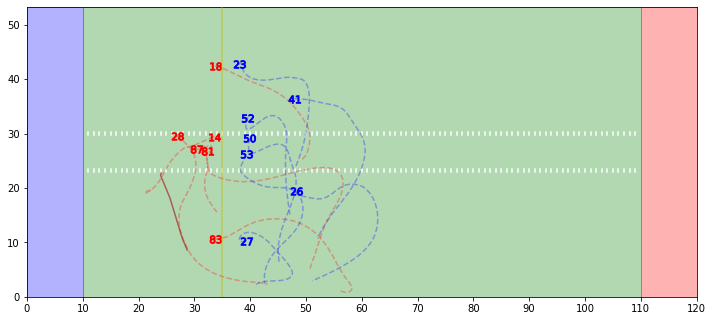

In [21]:
play.plot_play(markers='number')

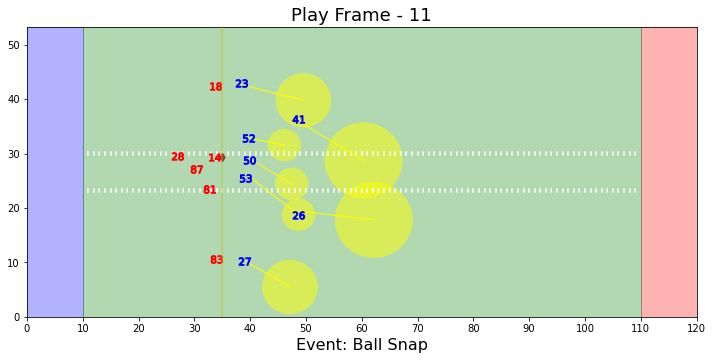

In [25]:
play.plot_play_frame(index='ball_snap',show_coverage=True,markers='number')

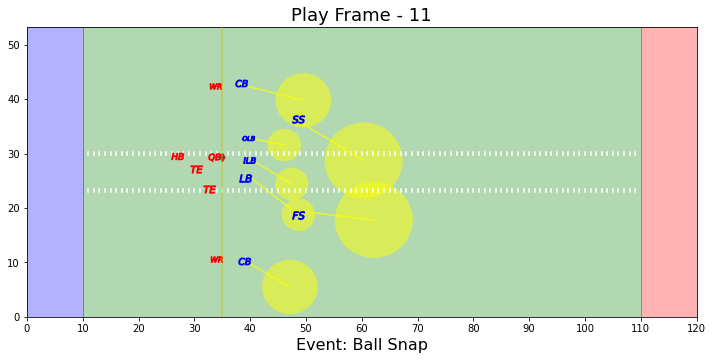

In [26]:
play.plot_play_frame(index='ball_snap',show_coverage=True,markers='position')

In [27]:
top_corner, bottom_corner = play.return_outside_corners()

In [28]:
top_corner.zone_coverage

True

In [29]:
top_corner.number

23

In [30]:
play.defensive_coverage_shell

'cover 4'

In [31]:
game.defense_coverage_shells()

{'cover 1': 29, 'cover 2': 0, 'cover 3': 0, 'cover 4': 1, 'cover 6': 0}

In [32]:
game.numberForwardPassPlays

30

In [33]:
#dst = os.path.join(basepath,'coverages',team.abbr,game.info,f'Play {play_number}','images')

In [34]:
#play.plot_play_frames(markers='number',show_coverage=True,target_directory=dst)